This notebook is an example of how to use the module `evaluation.py` for the evaluation of the output of the neural network.

In [1]:
from evaluation import mc_distance, mc_load_morphemes

In [2]:
# Initialise the language
mc_load_morphemes('Hebrew')

In [3]:
# Retrieve the evaluation lines from the output of the neural network
# and compile the list of distances.

distances = []

with open('results_morphology_2021-07-09.txt') as f:
   for line in f:
      l = line.split()
      if len(l) != 4:
         continue
      if l[3] == "correct":
         distances.append(0)
      elif l[3] == "wrong":
         distances.append(mc_distance(l[1], l[2]))

In [4]:
# These imports are necessary for the calculation of the error levels
from math import floor, log
from evaluation import Base, Dimensions

# A score is a tuple (is_correct, distance, error_level)
scores = []

for d in distances:
   if d == 0:
      level = Dimensions
   else:
      degree = floor(log(d)/log(Base))
      level = Dimensions - degree - 1
   scores.append((d == 0, d, level))

In [5]:
# Calculate the accuracy of the run
c = [s[0] for s in scores].count(True)
n = len(scores)
print(f'Accuracy: {c}/{n} = {c/n}')

Accuracy: 27175/29949 = 0.907375872316271


In [6]:
# Calculate the deviation of the run
from statistics import mean, stdev
distances = [s[1] for s in scores]
print(f'Deviation = {mean(distances)}, spread = {stdev(distances)}')

Deviation = 4597.698654379111, spread = 31509.983025174835


array([[<AxesSubplot:title={'center':'Error Level'}>]], dtype=object)

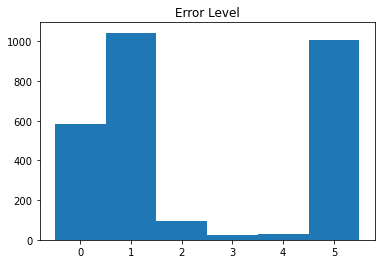

In [7]:
# Display a histogram of the error levels.
from pandas import DataFrame

# Apply a continuity correction to the range
r = [x - 1/2 for x in (0, Dimensions)]

df = DataFrame([s[2] for s in scores if not s[0]])
df.columns = ['Error Level']
df.hist(bins=Dimensions, grid=False, range=r)

#### Error Levels
0. Parse errors in the encoding
1. Difference of the surface form with the true surface form
2. Ungrammatical morpheme type combinations
3. Unparadigmatic morphemes
4. Difference in number of analytical words with the true form
5. Difference in morphemes with the true form